In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import format_axes
import numpy as np

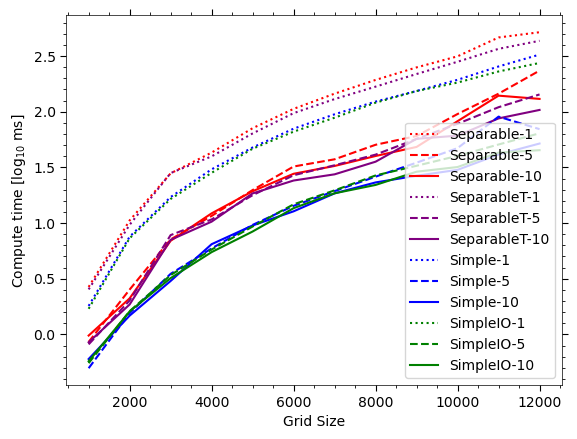

In [75]:
conv_df = pd.read_csv('convolutions.csv')
conv_df = conv_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

conv_df['duration'] = np.log10(conv_df['duration'])

for method in conv_df['method'].unique():
    for num_threads in conv_df['num_threads'].unique():

        subset = conv_df[(conv_df['method'] == method) & (conv_df['num_threads'] == num_threads)]

        colors = {
            'simple_convolve': 'blue', 
            'separable_convolution': 'red',
            'separable_convolution_T': 'purple',
            'simple_inner_outer': 'green'
        }

        m = {
            'simple_convolve': 'Simple', 
            'separable_convolution': 'Separable',
            'separable_convolution_T': 'SeparableT',
            'simple_inner_outer': 'SimpleIO'
        }

        ls = {
            1: ':',
            5: '--',
            10: '-'
        }

        plt.plot(subset['grid_size'], subset['duration'], c=colors[method], label=f'{m[method]}-{num_threads}', ls=ls[num_threads])

plt.xlabel('Grid Size')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

plt.savefig('convolutions.png', bbox_inches='tight')

In [82]:

conv_df


,method,num_threads,grid_size,duration
0,simple_inner_outer,1,5000,48.066333
1,simple_inner_outer,1,10000,208.548667
2,simple_inner_outer,2,5000,23.335667
3,simple_inner_outer,2,10000,117.024500
4,simple_inner_outer,3,5000,15.398667
5,simple_inner_outer,3,10000,74.007333
6,simple_inner_outer,4,5000,11.538333
7,simple_inner_outer,4,10000,55.959833
8,simple_inner_outer,5,5000,9.644333
9,simple_inner_outer,5,10000,45.724500


KeyError: 2

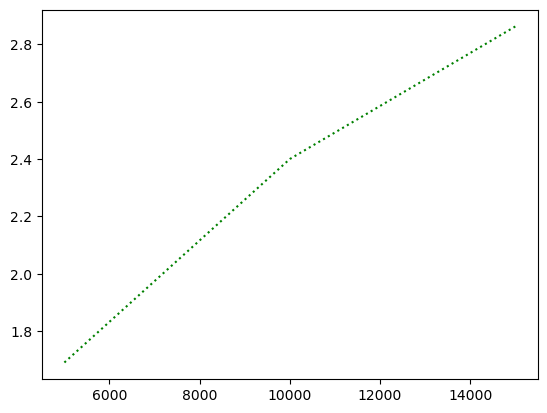

In [83]:
conv_df = pd.read_csv('simpleio_convolution.csv')
conv_df = conv_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()
conv_df

fig, ax = plt.subplots()

conv_df['duration'] = np.log10(conv_df['duration'])

for grid_size in conv_df['grid_size'].unique():
    subset = conv_df[(conv_df['grid_size'] == grid_size)]

    colors = {
        5000: 'reg',
        10000: 'green',
        15000: 'blue',
    }

    m = {
        'simple_convolve': 'Simple', 
        'separable_convolution': 'Separable',
        'separable_convolution_T': 'SeparableT',
        'simple_inner_outer': 'SimpleIO'
    }

    ls = {
        1: ':',
        5: '--',
        10: '-'
    }

    plt.plot(subset['num_threads'], subset['duration'], c=colors[method], label=f'{grid_size={grid_size}}')

plt.xlabel('OMP_NUM_THREADS')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

# plt.savefig('simpleio.png', bbox_inches='tight')

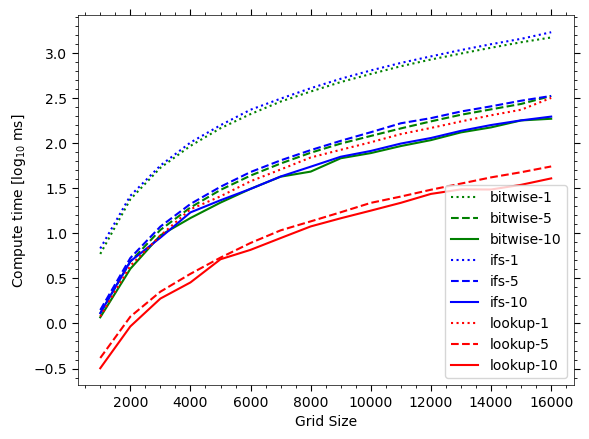

In [72]:
trans_df = pd.read_csv('transitions.csv')
trans_df = trans_df.groupby(['method', 'num_threads', 'grid_size']).mean().reset_index()

fig, ax = plt.subplots()

trans_df['duration'] = np.log10(trans_df['duration'])

for method in trans_df['method'].unique():
    for num_threads in trans_df['num_threads'].unique():

        subset = trans_df[(trans_df['method'] == method) & (trans_df['num_threads'] == num_threads)]

        colors = {
            'ifs': 'blue', 
            'lookup': 'red',
            'bitwise': 'green'
        }

        ls = {
            1: ':',
            5: '--',
            10: '-'
        }

        plt.plot(subset['grid_size'], subset['duration'], c=colors[method], label=f'{method}-{num_threads}', ls=ls[num_threads])

plt.xlabel('Grid Size')
plt.ylabel('Compute time [log$_{10}$ ms]')
plt.legend()
format_axes(ax)

plt.savefig('transitions.png', bbox_inches='tight')